In [1]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [2]:
# Dataset path and view possible targets
dataset_path = '/Users/Willie/data-speech_commands_v0.02'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

right
eight
cat
tree
backward
learn
bed
happy
go
dog
no
wow
follow
nine
left
stop
three
_background_noise_
sheila
one
bird
zero
seven
up
visual
marvin
two
house
down
six
yes
on
five
forward
off
four


In [3]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['right', 'eight', 'cat', 'tree', 'backward', 'learn', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'follow', 'nine', 'left', 'stop', 'three', '_background_noise_', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'visual', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'forward', 'off', 'four']


In [4]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['right', 'eight', 'cat', 'tree', 'backward', 'learn', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'follow', 'nine', 'left', 'stop', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'visual', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'forward', 'off', 'four']


In [5]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

3778
3787
2031
1759
1664
1575
2014
2054
3880
2128
3941
2123
1579
3934
3801
3872
3727
2022
3890
2064
4052
3998
3723
1592
2100
3880
2113
3917
3860
4044
3845
4052
1557
3745
3728
Total samples: 105829


In [6]:
# Settings
target_list = all_targets
feature_sets_file = 'Part1_Demo.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [7]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

/Users/Willie/data-speech_commands_v0.02/right
/Users/Willie/data-speech_commands_v0.02/eight
/Users/Willie/data-speech_commands_v0.02/cat
/Users/Willie/data-speech_commands_v0.02/tree
/Users/Willie/data-speech_commands_v0.02/backward
/Users/Willie/data-speech_commands_v0.02/learn
/Users/Willie/data-speech_commands_v0.02/bed
/Users/Willie/data-speech_commands_v0.02/happy
/Users/Willie/data-speech_commands_v0.02/go
/Users/Willie/data-speech_commands_v0.02/dog
/Users/Willie/data-speech_commands_v0.02/no
/Users/Willie/data-speech_commands_v0.02/wow
/Users/Willie/data-speech_commands_v0.02/follow
/Users/Willie/data-speech_commands_v0.02/nine
/Users/Willie/data-speech_commands_v0.02/left
/Users/Willie/data-speech_commands_v0.02/stop
/Users/Willie/data-speech_commands_v0.02/three
/Users/Willie/data-speech_commands_v0.02/sheila
/Users/Willie/data-speech_commands_v0.02/one
/Users/Willie/data-speech_commands_v0.02/bird
/Users/Willie/data-speech_commands_v0.02/zero
/Users/Willie/data-speech_comm

In [8]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [9]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [10]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [11]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

105829
105829


In [12]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [13]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [14]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [15]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [16]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
        

Dropped: 48 (16, 13)
Dropped: 56 (16, 15)
Dropped: 57 (16, 9)
Dropped: 61 (16, 8)
Dropped: 68 (16, 12)
Dropped: 69 (16, 11)
Dropped: 73 (16, 14)
Dropped: 76 (16, 14)
Dropped: 80 (16, 9)
Dropped: 84 (16, 12)
Dropped: 86 (16, 11)
Dropped: 87 (16, 15)
Dropped: 98 (16, 15)
Dropped: 99 (16, 13)
Dropped: 115 (16, 10)
Dropped: 129 (16, 8)
Dropped: 133 (16, 15)
Dropped: 144 (16, 15)
Dropped: 153 (16, 13)
Dropped: 166 (16, 10)
Dropped: 221 (16, 12)
Dropped: 234 (16, 11)
Dropped: 237 (16, 7)
Dropped: 251 (16, 10)
Dropped: 252 (16, 13)
Dropped: 261 (16, 13)
Dropped: 267 (16, 11)
Dropped: 268 (16, 10)
Dropped: 273 (16, 14)
Dropped: 279 (16, 11)
Dropped: 284 (16, 13)
Dropped: 307 (16, 15)
Dropped: 308 (16, 15)
Dropped: 320 (16, 14)
Dropped: 326 (16, 10)
Dropped: 350 (16, 13)
Dropped: 365 (16, 15)
Dropped: 386 (16, 12)
Dropped: 392 (16, 13)
Dropped: 393 (16, 13)
Dropped: 426 (16, 15)
Dropped: 441 (16, 6)
Dropped: 451 (16, 13)
Dropped: 461 (16, 15)
Dropped: 463 (16, 11)
Dropped: 484 (16, 13)


In [17]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.092


MFCCs: [[-7.41478193e+01 -7.28019259e+01 -7.03903060e+01 -5.63940066e+01
  -4.69468308e+01 -3.43492342e+01 -2.29669216e+01 -1.77144566e+01
  -1.78449607e+01 -2.28546468e+01 -2.98026422e+01 -3.31977430e+01
  -3.71046265e+01 -4.23768803e+01 -4.97931506e+01 -5.93655225e+01]
 [ 7.65038243e+00  9.29606112e+00  8.21030997e+00 -1.10576226e+00
  -3.54669253e+00  4.99969485e+00  1.23545098e+01  1.51011511e+01
   1.75361916e+01  2.13466845e+01  2.60617171e+01  2.68193262e+01
   2.71734939e+01  2.77725413e+01  2.69518792e+01  2.28534392e+01]
 [ 2.34760446e+00  1.28907702e+00  4.92922393e-01 -1.97302169e+00
  -3.65360769e+00 -7.79001728e-01 -9.54518454e-01 -9.63342116e-01
  -2.17325630e-01  1.41899583e+00  2.62780677e+00  3.06672358e+00
   3.55945164e+00  4.54384190e+00  5.74793651e+00  5.74865287e+00]
 [ 1.76348200e+00  1.51648729e+00  3.73300960e+00  5.86325293e+00
   4.20686168e+00  2.61586325e+00 -3.98885242e-01 -2.16689799e+00
  -3.56634251e+00 -5.34981832e+00 -7.71993061e+00 -8.41492241e+00


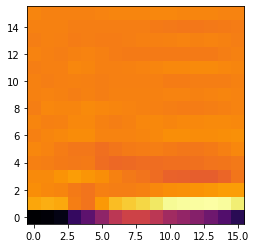

In [18]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 13

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [19]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [20]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
#print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
#print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
#print('Removed percentage:', prob / len(y_orig_test))

Dropped: 48 (16, 13)
Dropped: 56 (16, 15)
Dropped: 57 (16, 9)
Dropped: 61 (16, 8)
Dropped: 68 (16, 12)
Dropped: 69 (16, 11)
Dropped: 73 (16, 14)
Dropped: 76 (16, 14)
Dropped: 80 (16, 9)
Dropped: 84 (16, 12)
Dropped: 86 (16, 11)
Dropped: 87 (16, 15)
Dropped: 98 (16, 15)
Dropped: 99 (16, 13)
Dropped: 115 (16, 10)
Dropped: 129 (16, 8)
Dropped: 133 (16, 15)
Dropped: 144 (16, 15)
Dropped: 153 (16, 13)
Dropped: 166 (16, 10)
Dropped: 221 (16, 12)
Dropped: 234 (16, 11)
Dropped: 237 (16, 7)
Dropped: 251 (16, 10)
Dropped: 252 (16, 13)
Dropped: 261 (16, 13)
Dropped: 267 (16, 11)
Dropped: 268 (16, 10)
Dropped: 273 (16, 14)
Dropped: 279 (16, 11)
Dropped: 284 (16, 13)
Dropped: 307 (16, 15)
Dropped: 308 (16, 15)
Dropped: 320 (16, 14)
Dropped: 326 (16, 10)
Dropped: 350 (16, 13)
Dropped: 365 (16, 15)
Dropped: 386 (16, 12)
Dropped: 392 (16, 13)
Dropped: 393 (16, 13)
Dropped: 426 (16, 15)
Dropped: 441 (16, 6)
Dropped: 451 (16, 13)
Dropped: 461 (16, 15)
Dropped: 463 (16, 11)
Dropped: 484 (16, 13)
Dropped:

Dropped: 4023 (16, 10)
Dropped: 4041 (16, 15)
Dropped: 4056 (16, 14)
Dropped: 4064 (16, 15)
Dropped: 4083 (16, 13)
Dropped: 4096 (16, 13)
Dropped: 4099 (16, 14)
Dropped: 4102 (16, 11)
Dropped: 4116 (16, 13)
Dropped: 4149 (16, 13)
Dropped: 4159 (16, 14)
Dropped: 4163 (16, 15)
Dropped: 4170 (16, 12)
Dropped: 4190 (16, 12)
Dropped: 4205 (16, 11)
Dropped: 4216 (16, 9)
Dropped: 4222 (16, 15)
Dropped: 4223 (16, 12)
Dropped: 4243 (16, 15)
Dropped: 4300 (16, 15)
Dropped: 4305 (16, 11)
Dropped: 4316 (16, 11)
Dropped: 4317 (16, 15)
Dropped: 4319 (16, 12)
Dropped: 4352 (16, 12)
Dropped: 4361 (16, 13)
Dropped: 4367 (16, 10)
Dropped: 4378 (16, 12)
Dropped: 4380 (16, 13)
Dropped: 4392 (16, 12)
Dropped: 4403 (16, 14)
Dropped: 4466 (16, 14)
Dropped: 4467 (16, 14)
Dropped: 4469 (16, 15)
Dropped: 4475 (16, 11)
Dropped: 4490 (16, 14)
Dropped: 4505 (16, 14)
Dropped: 4510 (16, 15)
Dropped: 4535 (16, 9)
Dropped: 4538 (16, 12)
Dropped: 4539 (16, 14)
Dropped: 4563 (16, 11)
Dropped: 4604 (16, 13)
Dropped: 4621

Dropped: 8390 (16, 13)
Dropped: 8392 (16, 12)
Dropped: 8396 (16, 11)
Dropped: 8401 (16, 14)
Dropped: 8404 (16, 13)
Dropped: 8425 (16, 15)
Dropped: 8434 (16, 8)
Dropped: 8435 (16, 11)
Dropped: 8438 (16, 13)
Dropped: 8440 (16, 14)
Dropped: 8450 (16, 11)
Dropped: 8468 (16, 13)
Dropped: 8477 (16, 10)
Dropped: 8493 (16, 9)
Dropped: 8506 (16, 11)
Dropped: 8507 (16, 8)
Dropped: 8514 (16, 15)
Dropped: 8517 (16, 13)
Dropped: 8523 (16, 9)
Dropped: 8536 (16, 12)
Dropped: 8597 (16, 7)
Dropped: 8600 (16, 12)
Dropped: 8606 (16, 8)
Dropped: 8610 (16, 14)
Dropped: 8623 (16, 12)
Dropped: 8628 (16, 13)
Dropped: 8629 (16, 11)
Dropped: 8698 (16, 15)
Dropped: 8707 (16, 13)
Dropped: 8725 (16, 8)
Dropped: 8741 (16, 7)
Dropped: 8755 (16, 15)
Dropped: 8782 (16, 3)
Dropped: 8785 (16, 11)
Dropped: 8812 (16, 13)
Dropped: 8816 (16, 11)
Dropped: 8817 (16, 13)
Dropped: 8836 (16, 8)
Dropped: 8839 (16, 14)
Dropped: 8879 (16, 14)
Dropped: 8891 (16, 7)
Dropped: 8893 (16, 9)
Dropped: 8901 (16, 12)
Dropped: 8911 (16, 12)


Dropped: 12468 (16, 15)
Dropped: 12488 (16, 14)
Dropped: 12506 (16, 15)
Dropped: 12507 (16, 8)
Dropped: 12513 (16, 15)
Dropped: 12514 (16, 11)
Dropped: 12516 (16, 15)
Dropped: 12525 (16, 11)
Dropped: 12528 (16, 11)
Dropped: 12531 (16, 12)
Dropped: 12535 (16, 14)
Dropped: 12560 (16, 9)
Dropped: 12568 (16, 13)
Dropped: 12569 (16, 12)
Dropped: 12581 (16, 13)
Dropped: 12596 (16, 9)
Dropped: 12609 (16, 11)
Dropped: 12620 (16, 11)
Dropped: 12622 (16, 11)
Dropped: 12635 (16, 11)
Dropped: 12643 (16, 14)
Dropped: 12649 (16, 14)
Dropped: 12658 (16, 6)
Dropped: 12660 (16, 11)
Dropped: 12665 (16, 9)
Dropped: 12667 (16, 13)
Dropped: 12672 (16, 14)
Dropped: 12675 (16, 15)
Dropped: 12691 (16, 11)
Dropped: 12718 (16, 15)
Dropped: 12747 (16, 7)
Dropped: 12752 (16, 13)
Dropped: 12756 (16, 8)
Dropped: 12761 (16, 9)
Dropped: 12771 (16, 14)
Dropped: 12775 (16, 15)
Dropped: 12784 (16, 14)
Dropped: 12803 (16, 7)
Dropped: 12812 (16, 15)
Dropped: 12818 (16, 15)
Dropped: 12837 (16, 8)
Dropped: 12838 (16, 9)
Dro

Dropped: 16402 (16, 12)
Dropped: 16419 (16, 11)
Dropped: 16430 (16, 8)
Dropped: 16438 (16, 15)
Dropped: 16439 (16, 9)
Dropped: 16440 (16, 14)
Dropped: 16443 (16, 9)
Dropped: 16463 (16, 13)
Dropped: 16467 (16, 14)
Dropped: 16471 (16, 13)
Dropped: 16475 (16, 12)
Dropped: 16476 (16, 10)
Dropped: 16477 (16, 15)
Dropped: 16491 (16, 13)
Dropped: 16499 (16, 10)
Dropped: 16541 (16, 13)
Dropped: 16545 (16, 9)
Dropped: 16547 (16, 11)
Dropped: 16577 (16, 14)
Dropped: 16581 (16, 7)
Dropped: 16590 (16, 10)
Dropped: 16617 (16, 7)
Dropped: 16636 (16, 15)
Dropped: 16643 (16, 14)
Dropped: 16659 (16, 11)
Dropped: 16677 (16, 14)
Dropped: 16712 (16, 14)
Dropped: 16740 (16, 11)
Dropped: 16753 (16, 7)
Dropped: 16754 (16, 7)
Dropped: 16776 (16, 13)
Dropped: 16780 (16, 14)
Dropped: 16782 (16, 10)
Dropped: 16821 (16, 9)
Dropped: 16823 (16, 11)
Dropped: 16824 (16, 13)
Dropped: 16828 (16, 15)
Dropped: 16858 (16, 12)
Dropped: 16884 (16, 9)
Dropped: 16885 (16, 15)
Dropped: 16925 (16, 13)
Dropped: 16926 (16, 9)
Dro

Dropped: 20645 (16, 14)
Dropped: 20665 (16, 11)
Dropped: 20669 (16, 15)
Dropped: 20670 (16, 12)
Dropped: 20673 (16, 4)
Dropped: 20684 (16, 15)
Dropped: 20699 (16, 14)
Dropped: 20705 (16, 14)
Dropped: 20713 (16, 15)
Dropped: 20718 (16, 15)
Dropped: 20722 (16, 15)
Dropped: 20727 (16, 15)
Dropped: 20729 (16, 10)
Dropped: 20730 (16, 9)
Dropped: 20740 (16, 15)
Dropped: 20761 (16, 14)
Dropped: 20767 (16, 11)
Dropped: 20776 (16, 11)
Dropped: 20786 (16, 7)
Dropped: 20787 (16, 13)
Dropped: 20789 (16, 6)
Dropped: 20790 (16, 12)
Dropped: 20798 (16, 10)
Dropped: 20806 (16, 13)
Dropped: 20821 (16, 12)
Dropped: 20823 (16, 13)
Dropped: 20824 (16, 10)
Dropped: 20840 (16, 11)
Dropped: 20846 (16, 13)
Dropped: 20849 (16, 14)
Dropped: 20850 (16, 14)
Dropped: 20861 (16, 13)
Dropped: 20872 (16, 7)
Dropped: 20878 (16, 10)
Dropped: 20898 (16, 8)
Dropped: 20903 (16, 13)
Dropped: 20907 (16, 7)
Dropped: 20930 (16, 12)
Dropped: 20948 (16, 8)
Dropped: 20950 (16, 15)
Dropped: 20965 (16, 9)
Dropped: 20966 (16, 13)
D

Dropped: 24522 (16, 11)
Dropped: 24530 (16, 11)
Dropped: 24547 (16, 12)
Dropped: 24561 (16, 5)
Dropped: 24574 (16, 10)
Dropped: 24577 (16, 15)
Dropped: 24591 (16, 13)
Dropped: 24592 (16, 9)
Dropped: 24595 (16, 8)
Dropped: 24633 (16, 7)
Dropped: 24634 (16, 13)
Dropped: 24658 (16, 13)
Dropped: 24664 (16, 12)
Dropped: 24667 (16, 12)
Dropped: 24677 (16, 9)
Dropped: 24685 (16, 15)
Dropped: 24698 (16, 9)
Dropped: 24705 (16, 8)
Dropped: 24727 (16, 13)
Dropped: 24753 (16, 13)
Dropped: 24759 (16, 15)
Dropped: 24760 (16, 15)
Dropped: 24767 (16, 12)
Dropped: 24770 (16, 13)
Dropped: 24771 (16, 12)
Dropped: 24774 (16, 13)
Dropped: 24775 (16, 11)
Dropped: 24777 (16, 14)
Dropped: 24789 (16, 14)
Dropped: 24799 (16, 11)
Dropped: 24806 (16, 12)
Dropped: 24825 (16, 13)
Dropped: 24835 (16, 8)
Dropped: 24836 (16, 11)
Dropped: 24853 (16, 4)
Dropped: 24858 (16, 14)
Dropped: 24888 (16, 9)
Dropped: 24892 (16, 15)
Dropped: 24894 (16, 10)
Dropped: 24899 (16, 12)
Dropped: 24905 (16, 14)
Dropped: 24910 (16, 13)
Dr

Dropped: 28512 (16, 14)
Dropped: 28514 (16, 15)
Dropped: 28518 (16, 15)
Dropped: 28526 (16, 14)
Dropped: 28538 (16, 11)
Dropped: 28550 (16, 12)
Dropped: 28552 (16, 13)
Dropped: 28554 (16, 8)
Dropped: 28579 (16, 8)
Dropped: 28584 (16, 8)
Dropped: 28587 (16, 13)
Dropped: 28592 (16, 7)
Dropped: 28594 (16, 13)
Dropped: 28597 (16, 14)
Dropped: 28598 (16, 12)
Dropped: 28602 (16, 15)
Dropped: 28608 (16, 8)
Dropped: 28629 (16, 12)
Dropped: 28638 (16, 7)
Dropped: 28640 (16, 13)
Dropped: 28641 (16, 15)
Dropped: 28651 (16, 8)
Dropped: 28655 (16, 10)
Dropped: 28664 (16, 14)
Dropped: 28678 (16, 12)
Dropped: 28688 (16, 11)
Dropped: 28716 (16, 12)
Dropped: 28725 (16, 13)
Dropped: 28745 (16, 7)
Dropped: 28790 (16, 15)
Dropped: 28795 (16, 15)
Dropped: 28808 (16, 12)
Dropped: 28815 (16, 13)
Dropped: 28825 (16, 9)
Dropped: 28827 (16, 11)
Dropped: 28831 (16, 15)
Dropped: 28836 (16, 15)
Dropped: 28838 (16, 13)
Dropped: 28868 (16, 15)
Dropped: 28876 (16, 14)
Dropped: 28880 (16, 12)
Dropped: 28883 (16, 15)
D

Dropped: 32240 (16, 13)
Dropped: 32250 (16, 11)
Dropped: 32263 (16, 11)
Dropped: 32277 (16, 15)
Dropped: 32278 (16, 11)
Dropped: 32307 (16, 12)
Dropped: 32308 (16, 12)
Dropped: 32329 (16, 13)
Dropped: 32331 (16, 14)
Dropped: 32357 (16, 15)
Dropped: 32362 (16, 13)
Dropped: 32363 (16, 14)
Dropped: 32366 (16, 13)
Dropped: 32368 (16, 12)
Dropped: 32372 (16, 11)
Dropped: 32402 (16, 8)
Dropped: 32403 (16, 10)
Dropped: 32422 (16, 15)
Dropped: 32424 (16, 15)
Dropped: 32429 (16, 10)
Dropped: 32447 (16, 5)
Dropped: 32452 (16, 15)
Dropped: 32454 (16, 8)
Dropped: 32471 (16, 12)
Dropped: 32474 (16, 11)
Dropped: 32478 (16, 12)
Dropped: 32509 (16, 11)
Dropped: 32529 (16, 11)
Dropped: 32532 (16, 7)
Dropped: 32549 (16, 12)
Dropped: 32552 (16, 5)
Dropped: 32557 (16, 5)
Dropped: 32573 (16, 13)
Dropped: 32577 (16, 13)
Dropped: 32589 (16, 11)
Dropped: 32632 (16, 13)
Dropped: 32633 (16, 6)
Dropped: 32646 (16, 11)
Dropped: 32650 (16, 12)
Dropped: 32701 (16, 10)
Dropped: 32712 (16, 14)
Dropped: 32719 (16, 13)

Dropped: 36311 (16, 13)
Dropped: 36355 (16, 11)
Dropped: 36380 (16, 13)
Dropped: 36384 (16, 13)
Dropped: 36394 (16, 13)
Dropped: 36406 (16, 15)
Dropped: 36420 (16, 13)
Dropped: 36431 (16, 11)
Dropped: 36432 (16, 13)
Dropped: 36442 (16, 10)
Dropped: 36443 (16, 9)
Dropped: 36451 (16, 14)
Dropped: 36453 (16, 11)
Dropped: 36455 (16, 13)
Dropped: 36464 (16, 15)
Dropped: 36465 (16, 14)
Dropped: 36467 (16, 13)
Dropped: 36500 (16, 15)
Dropped: 36533 (16, 11)
Dropped: 36567 (16, 11)
Dropped: 36571 (16, 10)
Dropped: 36593 (16, 9)
Dropped: 36601 (16, 13)
Dropped: 36624 (16, 11)
Dropped: 36628 (16, 13)
Dropped: 36636 (16, 13)
Dropped: 36653 (16, 13)
Dropped: 36677 (16, 11)
Dropped: 36689 (16, 13)
Dropped: 36690 (16, 10)
Dropped: 36691 (16, 15)
Dropped: 36692 (16, 1)
Dropped: 36737 (16, 7)
Dropped: 36815 (16, 8)
Dropped: 36836 (16, 4)
Dropped: 36839 (16, 8)
Dropped: 36867 (16, 15)
Dropped: 36878 (16, 11)
Dropped: 36883 (16, 11)
Dropped: 36895 (16, 13)
Dropped: 36909 (16, 9)
Dropped: 36912 (16, 12)


Dropped: 40430 (16, 3)
Dropped: 40444 (16, 10)
Dropped: 40446 (16, 11)
Dropped: 40460 (16, 15)
Dropped: 40464 (16, 13)
Dropped: 40495 (16, 15)
Dropped: 40497 (16, 13)
Dropped: 40517 (16, 12)
Dropped: 40539 (16, 7)
Dropped: 40541 (16, 10)
Dropped: 40543 (16, 14)
Dropped: 40589 (16, 13)
Dropped: 40590 (16, 12)
Dropped: 40606 (16, 15)
Dropped: 40616 (16, 14)
Dropped: 40618 (16, 7)
Dropped: 40619 (16, 15)
Dropped: 40622 (16, 13)
Dropped: 40660 (16, 15)
Dropped: 40672 (16, 12)
Dropped: 40684 (16, 7)
Dropped: 40698 (16, 9)
Dropped: 40715 (16, 14)
Dropped: 40728 (16, 15)
Dropped: 40738 (16, 12)
Dropped: 40746 (16, 11)
Dropped: 40749 (16, 7)
Dropped: 40757 (16, 11)
Dropped: 40766 (16, 8)
Dropped: 40791 (16, 11)
Dropped: 40812 (16, 9)
Dropped: 40826 (16, 11)
Dropped: 40828 (16, 13)
Dropped: 40837 (16, 8)
Dropped: 40841 (16, 14)
Dropped: 40859 (16, 13)
Dropped: 40871 (16, 12)
Dropped: 40880 (16, 13)
Dropped: 40887 (16, 12)
Dropped: 40889 (16, 12)
Dropped: 40921 (16, 10)
Dropped: 40925 (16, 14)
D

Dropped: 44368 (16, 9)
Dropped: 44375 (16, 11)
Dropped: 44384 (16, 13)
Dropped: 44385 (16, 12)
Dropped: 44398 (16, 6)
Dropped: 44437 (16, 11)
Dropped: 44442 (16, 12)
Dropped: 44465 (16, 11)
Dropped: 44487 (16, 13)
Dropped: 44506 (16, 14)
Dropped: 44514 (16, 7)
Dropped: 44515 (16, 8)
Dropped: 44520 (16, 6)
Dropped: 44522 (16, 12)
Dropped: 44549 (16, 15)
Dropped: 44581 (16, 13)
Dropped: 44589 (16, 6)
Dropped: 44597 (16, 13)
Dropped: 44610 (16, 13)
Dropped: 44612 (16, 15)
Dropped: 44645 (16, 11)
Dropped: 44649 (16, 14)
Dropped: 44672 (16, 11)
Dropped: 44677 (16, 13)
Dropped: 44698 (16, 13)
Dropped: 44712 (16, 15)
Dropped: 44736 (16, 12)
Dropped: 44742 (16, 13)
Dropped: 44750 (16, 13)
Dropped: 44764 (16, 8)
Dropped: 44767 (16, 12)
Dropped: 44796 (16, 11)
Dropped: 44815 (16, 9)
Dropped: 44816 (16, 13)
Dropped: 44821 (16, 13)
Dropped: 44834 (16, 15)
Dropped: 44860 (16, 8)
Dropped: 44871 (16, 12)
Dropped: 44879 (16, 10)
Dropped: 44880 (16, 13)
Dropped: 44891 (16, 8)
Dropped: 44909 (16, 8)
Dro

Dropped: 48718 (16, 15)
Dropped: 48726 (16, 15)
Dropped: 48753 (16, 13)
Dropped: 48766 (16, 15)
Dropped: 48786 (16, 7)
Dropped: 48795 (16, 7)
Dropped: 48800 (16, 15)
Dropped: 48809 (16, 11)
Dropped: 48810 (16, 14)
Dropped: 48817 (16, 15)
Dropped: 48818 (16, 12)
Dropped: 48820 (16, 8)
Dropped: 48829 (16, 14)
Dropped: 48843 (16, 12)
Dropped: 48860 (16, 13)
Dropped: 48862 (16, 12)
Dropped: 48866 (16, 13)
Dropped: 48870 (16, 13)
Dropped: 48873 (16, 15)
Dropped: 48890 (16, 15)
Dropped: 48891 (16, 8)
Dropped: 48906 (16, 15)
Dropped: 48926 (16, 15)
Dropped: 48937 (16, 13)
Dropped: 48942 (16, 15)
Dropped: 48969 (16, 14)
Dropped: 48980 (16, 12)
Dropped: 48993 (16, 13)
Dropped: 48999 (16, 14)
Dropped: 49001 (16, 14)
Dropped: 49002 (16, 8)
Dropped: 49022 (16, 15)
Dropped: 49070 (16, 14)
Dropped: 49091 (16, 12)
Dropped: 49101 (16, 11)
Dropped: 49106 (16, 14)
Dropped: 49119 (16, 12)
Dropped: 49124 (16, 10)
Dropped: 49130 (16, 10)
Dropped: 49135 (16, 15)
Dropped: 49146 (16, 14)
Dropped: 49149 (16, 1

Dropped: 52678 (16, 10)
Dropped: 52679 (16, 10)
Dropped: 52694 (16, 11)
Dropped: 52697 (16, 14)
Dropped: 52705 (16, 15)
Dropped: 52719 (16, 12)
Dropped: 52756 (16, 13)
Dropped: 52784 (16, 12)
Dropped: 52787 (16, 14)
Dropped: 52795 (16, 13)
Dropped: 52828 (16, 9)
Dropped: 52832 (16, 15)
Dropped: 52843 (16, 13)
Dropped: 52857 (16, 9)
Dropped: 52866 (16, 14)
Dropped: 52871 (16, 10)
Dropped: 52880 (16, 12)
Dropped: 52881 (16, 12)
Dropped: 52894 (16, 14)
Dropped: 52897 (16, 13)
Dropped: 52902 (16, 11)
Dropped: 52910 (16, 7)
Dropped: 52922 (16, 10)
Dropped: 52936 (16, 15)
Dropped: 52939 (16, 13)
Dropped: 52942 (16, 4)
Dropped: 52946 (16, 9)
Dropped: 52959 (16, 15)
Dropped: 52992 (16, 4)
Dropped: 52996 (16, 8)
Dropped: 53027 (16, 13)
Dropped: 53028 (16, 10)
Dropped: 53033 (16, 14)
Dropped: 53063 (16, 11)
Dropped: 53065 (16, 15)
Dropped: 53095 (16, 10)
Dropped: 53101 (16, 7)
Dropped: 53104 (16, 11)
Dropped: 53124 (16, 14)
Dropped: 53125 (16, 8)
Dropped: 53134 (16, 12)
Dropped: 53139 (16, 15)
D

Dropped: 56641 (16, 15)
Dropped: 56643 (16, 13)
Dropped: 56649 (16, 11)
Dropped: 56650 (16, 15)
Dropped: 56655 (16, 6)
Dropped: 56666 (16, 13)
Dropped: 56671 (16, 9)
Dropped: 56678 (16, 14)
Dropped: 56688 (16, 3)
Dropped: 56690 (16, 11)
Dropped: 56696 (16, 15)
Dropped: 56699 (16, 13)
Dropped: 56709 (16, 11)
Dropped: 56767 (16, 8)
Dropped: 56770 (16, 14)
Dropped: 56786 (16, 15)
Dropped: 56797 (16, 13)
Dropped: 56799 (16, 13)
Dropped: 56811 (16, 14)
Dropped: 56812 (16, 11)
Dropped: 56819 (16, 15)
Dropped: 56831 (16, 14)
Dropped: 56845 (16, 8)
Dropped: 56847 (16, 11)
Dropped: 56878 (16, 14)
Dropped: 56900 (16, 15)
Dropped: 56915 (16, 7)
Dropped: 56937 (16, 10)
Dropped: 56946 (16, 15)
Dropped: 56958 (16, 13)
Dropped: 56961 (16, 5)
Dropped: 56969 (16, 12)
Dropped: 56970 (16, 13)
Dropped: 56995 (16, 14)
Dropped: 57044 (16, 10)
Dropped: 57067 (16, 12)
Dropped: 57101 (16, 14)
Dropped: 57107 (16, 9)
Dropped: 57119 (16, 14)
Dropped: 57130 (16, 8)
Dropped: 57149 (16, 13)
Dropped: 57160 (16, 11)
D

Dropped: 60656 (16, 14)
Dropped: 60669 (16, 10)
Dropped: 60684 (16, 5)
Dropped: 60700 (16, 13)
Dropped: 60709 (16, 11)
Dropped: 60712 (16, 7)
Dropped: 60717 (16, 11)
Dropped: 60748 (16, 12)
Dropped: 60765 (16, 14)
Dropped: 60794 (16, 7)
Dropped: 60820 (16, 11)
Dropped: 60823 (16, 11)
Dropped: 60838 (16, 13)
Dropped: 60843 (16, 15)
Dropped: 60857 (16, 8)
Dropped: 60903 (16, 13)
Dropped: 60907 (16, 11)
Dropped: 60914 (16, 12)
Dropped: 60932 (16, 10)
Dropped: 60936 (16, 15)
Dropped: 60978 (16, 14)
Dropped: 60992 (16, 15)
Dropped: 60996 (16, 11)
Dropped: 61000 (16, 15)
Dropped: 61011 (16, 11)
Dropped: 61015 (16, 5)
Dropped: 61039 (16, 11)
Dropped: 61047 (16, 14)
Dropped: 61050 (16, 12)
Dropped: 61063 (16, 11)
Dropped: 61068 (16, 11)
Dropped: 61081 (16, 13)
Dropped: 61085 (16, 14)
Dropped: 61089 (16, 13)
Dropped: 61096 (16, 8)
Dropped: 61103 (16, 15)
Dropped: 61110 (16, 14)
Dropped: 61112 (16, 15)
Dropped: 61118 (16, 9)
Dropped: 61134 (16, 9)
Dropped: 61136 (16, 13)
Dropped: 61153 (16, 15)


Dropped: 64642 (16, 12)
Dropped: 64659 (16, 15)
Dropped: 64663 (16, 15)
Dropped: 64668 (16, 8)
Dropped: 64687 (16, 15)
Dropped: 64704 (16, 11)
Dropped: 64709 (16, 9)
Dropped: 64722 (16, 12)
Dropped: 64739 (16, 11)
Dropped: 64745 (16, 15)
Dropped: 64749 (16, 10)
Dropped: 64784 (16, 14)
Dropped: 64787 (16, 15)
Dropped: 64797 (16, 14)
Dropped: 64801 (16, 14)
Dropped: 64806 (16, 8)
Dropped: 64809 (16, 11)
Dropped: 64811 (16, 13)
Dropped: 64831 (16, 12)
Dropped: 64836 (16, 14)
Dropped: 64851 (16, 13)
Dropped: 64863 (16, 8)
Dropped: 64873 (16, 14)
Dropped: 64876 (16, 11)
Dropped: 64900 (16, 13)
Dropped: 64908 (16, 8)
Dropped: 64909 (16, 6)
Dropped: 64934 (16, 9)
Dropped: 64936 (16, 13)
Dropped: 64938 (16, 12)
Dropped: 64942 (16, 12)
Dropped: 64971 (16, 10)
Dropped: 64978 (16, 13)
Dropped: 64981 (16, 13)
Dropped: 64991 (16, 13)
Dropped: 64996 (16, 14)
Dropped: 65007 (16, 7)
Dropped: 65008 (16, 12)
Dropped: 65026 (16, 15)
Dropped: 65067 (16, 13)
Dropped: 65071 (16, 7)
Dropped: 65080 (16, 15)
D

Dropped: 68637 (16, 15)
Dropped: 68646 (16, 10)
Dropped: 68651 (16, 13)
Dropped: 68653 (16, 11)
Dropped: 68655 (16, 15)
Dropped: 68660 (16, 15)
Dropped: 68688 (16, 13)
Dropped: 68701 (16, 14)
Dropped: 68711 (16, 13)
Dropped: 68715 (16, 15)
Dropped: 68724 (16, 4)
Dropped: 68730 (16, 9)
Dropped: 68785 (16, 13)
Dropped: 68791 (16, 12)
Dropped: 68793 (16, 14)
Dropped: 68797 (16, 11)
Dropped: 68821 (16, 13)
Dropped: 68824 (16, 13)
Dropped: 68829 (16, 13)
Dropped: 68838 (16, 12)
Dropped: 68844 (16, 14)
Dropped: 68851 (16, 11)
Dropped: 68856 (16, 11)
Dropped: 68860 (16, 12)
Dropped: 68868 (16, 9)
Dropped: 68874 (16, 12)
Dropped: 68875 (16, 15)
Dropped: 68884 (16, 6)
Dropped: 68898 (16, 9)
Dropped: 68904 (16, 13)
Dropped: 68910 (16, 12)
Dropped: 68924 (16, 12)
Dropped: 68928 (16, 13)
Dropped: 68932 (16, 12)
Dropped: 68943 (16, 10)
Dropped: 68953 (16, 10)
Dropped: 68968 (16, 15)
Dropped: 68996 (16, 14)
Dropped: 68999 (16, 14)
Dropped: 69016 (16, 14)
Dropped: 69019 (16, 14)
Dropped: 69032 (16, 1

Dropped: 72559 (16, 15)
Dropped: 72560 (16, 15)
Dropped: 72580 (16, 13)
Dropped: 72584 (16, 13)
Dropped: 72586 (16, 11)
Dropped: 72598 (16, 13)
Dropped: 72603 (16, 15)
Dropped: 72613 (16, 12)
Dropped: 72619 (16, 13)
Dropped: 72624 (16, 13)
Dropped: 72637 (16, 7)
Dropped: 72649 (16, 9)
Dropped: 72689 (16, 10)
Dropped: 72690 (16, 13)
Dropped: 72691 (16, 8)
Dropped: 72722 (16, 13)
Dropped: 72732 (16, 10)
Dropped: 72737 (16, 13)
Dropped: 72773 (16, 7)
Dropped: 72777 (16, 14)
Dropped: 72786 (16, 8)
Dropped: 72788 (16, 7)
Dropped: 72833 (16, 15)
Dropped: 72843 (16, 15)
Dropped: 72850 (16, 8)
Dropped: 72874 (16, 11)
Dropped: 72905 (16, 15)
Dropped: 72910 (16, 15)
Dropped: 72930 (16, 13)
Dropped: 72940 (16, 11)
Dropped: 72944 (16, 13)
Dropped: 72946 (16, 11)
Dropped: 72950 (16, 14)
Dropped: 72992 (16, 9)
Dropped: 72996 (16, 11)
Dropped: 73009 (16, 14)
Dropped: 73021 (16, 9)
Dropped: 73026 (16, 7)
Dropped: 73029 (16, 15)
Dropped: 73030 (16, 15)
Dropped: 73069 (16, 10)
Dropped: 73070 (16, 14)
Dr

Dropped: 76799 (16, 12)
Dropped: 76815 (16, 11)
Dropped: 76819 (16, 12)
Dropped: 76824 (16, 9)
Dropped: 76832 (16, 15)
Dropped: 76852 (16, 15)
Dropped: 76856 (16, 14)
Dropped: 76890 (16, 12)
Dropped: 76894 (16, 7)
Dropped: 76903 (16, 11)
Dropped: 76925 (16, 15)
Dropped: 76927 (16, 15)
Dropped: 76947 (16, 14)
Dropped: 76957 (16, 13)
Dropped: 76964 (16, 15)
Dropped: 76969 (16, 10)
Dropped: 76999 (16, 14)
Dropped: 77017 (16, 10)
Dropped: 77024 (16, 13)
Dropped: 77033 (16, 13)
Dropped: 77043 (16, 11)
Dropped: 77055 (16, 12)
Dropped: 77065 (16, 14)
Dropped: 77096 (16, 13)
Dropped: 77103 (16, 14)
Dropped: 77138 (16, 14)
Dropped: 77145 (16, 15)
Dropped: 77162 (16, 15)
Dropped: 77166 (16, 13)
Dropped: 77168 (16, 9)
Dropped: 77180 (16, 11)
Dropped: 77185 (16, 9)
Dropped: 77190 (16, 13)
Dropped: 77209 (16, 12)
Dropped: 77245 (16, 12)
Dropped: 77261 (16, 11)
Dropped: 77277 (16, 14)
Dropped: 77280 (16, 12)
Dropped: 77281 (16, 7)
Dropped: 77310 (16, 14)
Dropped: 77320 (16, 11)
Dropped: 77337 (16, 1

Dropped: 81126 (16, 9)
Dropped: 81137 (16, 11)
Dropped: 81146 (16, 12)
Dropped: 81155 (16, 14)
Dropped: 81156 (16, 11)
Dropped: 81173 (16, 14)
Dropped: 81184 (16, 13)
Dropped: 81188 (16, 13)
Dropped: 81193 (16, 13)
Dropped: 81216 (16, 11)
Dropped: 81220 (16, 11)
Dropped: 81228 (16, 13)
Dropped: 81231 (16, 11)
Dropped: 81235 (16, 14)
Dropped: 81236 (16, 13)
Dropped: 81238 (16, 15)
Dropped: 81243 (16, 10)
Dropped: 81252 (16, 12)
Dropped: 81262 (16, 15)
Dropped: 81267 (16, 14)
Dropped: 81272 (16, 11)
Dropped: 81275 (16, 11)
Dropped: 81281 (16, 15)
Dropped: 81296 (16, 11)
Dropped: 81311 (16, 12)
Dropped: 81320 (16, 15)
Dropped: 81346 (16, 11)
Dropped: 81367 (16, 7)
Dropped: 81375 (16, 15)
Dropped: 81377 (16, 15)
Dropped: 81378 (16, 10)
Dropped: 81391 (16, 14)
Dropped: 81412 (16, 15)
Dropped: 81428 (16, 9)
Dropped: 81446 (16, 11)
Dropped: 81448 (16, 12)
Dropped: 81452 (16, 7)
Dropped: 81479 (16, 15)
Dropped: 81507 (16, 11)
Dropped: 81511 (16, 11)
Dropped: 81516 (16, 13)
Dropped: 81546 (16, 

Dropped: 588 (16, 13)
Dropped: 589 (16, 11)
Dropped: 623 (16, 8)
Dropped: 630 (16, 14)
Dropped: 635 (16, 11)
Dropped: 679 (16, 12)
Dropped: 687 (16, 10)
Dropped: 695 (16, 13)
Dropped: 712 (16, 8)
Dropped: 721 (16, 12)
Dropped: 744 (16, 11)
Dropped: 752 (16, 11)
Dropped: 755 (16, 15)
Dropped: 760 (16, 13)
Dropped: 763 (16, 13)
Dropped: 765 (16, 13)
Dropped: 779 (16, 12)
Dropped: 796 (16, 11)
Dropped: 820 (16, 13)
Dropped: 821 (16, 8)
Dropped: 828 (16, 11)
Dropped: 833 (16, 11)
Dropped: 845 (16, 10)
Dropped: 850 (16, 7)
Dropped: 855 (16, 9)
Dropped: 875 (16, 8)
Dropped: 886 (16, 7)
Dropped: 918 (16, 15)
Dropped: 924 (16, 15)
Dropped: 934 (16, 11)
Dropped: 946 (16, 11)
Dropped: 964 (16, 15)
Dropped: 972 (16, 11)
Dropped: 1001 (16, 11)
Dropped: 1017 (16, 12)
Dropped: 1018 (16, 15)
Dropped: 1036 (16, 11)
Dropped: 1049 (16, 14)
Dropped: 1063 (16, 10)
Dropped: 1065 (16, 13)
Dropped: 1082 (16, 12)
Dropped: 1084 (16, 11)
Dropped: 1088 (16, 15)
Dropped: 1094 (16, 12)
Dropped: 1119 (16, 12)
Dropp

Dropped: 5127 (16, 7)
Dropped: 5152 (16, 12)
Dropped: 5175 (16, 15)
Dropped: 5186 (16, 12)
Dropped: 5191 (16, 13)
Dropped: 5194 (16, 14)
Dropped: 5197 (16, 12)
Dropped: 5208 (16, 13)
Dropped: 5211 (16, 15)
Dropped: 5230 (16, 13)
Dropped: 5234 (16, 12)
Dropped: 5246 (16, 12)
Dropped: 5259 (16, 13)
Dropped: 5274 (16, 12)
Dropped: 5280 (16, 13)
Dropped: 5292 (16, 13)
Dropped: 5297 (16, 11)
Dropped: 5306 (16, 12)
Dropped: 5319 (16, 12)
Dropped: 5332 (16, 15)
Dropped: 5333 (16, 14)
Dropped: 5346 (16, 5)
Dropped: 5354 (16, 9)
Dropped: 5370 (16, 12)
Dropped: 5380 (16, 10)
Dropped: 5393 (16, 15)
Dropped: 5405 (16, 15)
Dropped: 5412 (16, 8)
Dropped: 5425 (16, 11)
Dropped: 5431 (16, 11)
Dropped: 5465 (16, 8)
Dropped: 5481 (16, 14)
Dropped: 5506 (16, 7)
Dropped: 5512 (16, 13)
Dropped: 5514 (16, 13)
Dropped: 5540 (16, 11)
Dropped: 5543 (16, 14)
Dropped: 5544 (16, 15)
Dropped: 5545 (16, 12)
Dropped: 5551 (16, 15)
Dropped: 5552 (16, 14)
Dropped: 5554 (16, 15)
Dropped: 5558 (16, 14)
Dropped: 5562 (16

Dropped: 9335 (16, 13)
Dropped: 9337 (16, 13)
Dropped: 9339 (16, 7)
Dropped: 9358 (16, 10)
Dropped: 9362 (16, 12)
Dropped: 9372 (16, 14)
Dropped: 9379 (16, 10)
Dropped: 9383 (16, 11)
Dropped: 9401 (16, 14)
Dropped: 9406 (16, 15)
Dropped: 9430 (16, 12)
Dropped: 9432 (16, 9)
Dropped: 9436 (16, 13)
Dropped: 9455 (16, 13)
Dropped: 9456 (16, 15)
Dropped: 9462 (16, 11)
Dropped: 9468 (16, 8)
Dropped: 9483 (16, 13)
Dropped: 9487 (16, 14)
Dropped: 9493 (16, 13)
Dropped: 9495 (16, 13)
Dropped: 9509 (16, 12)
Dropped: 9510 (16, 12)
Dropped: 9526 (16, 14)
Dropped: 9534 (16, 15)
Dropped: 9538 (16, 13)
Dropped: 9565 (16, 8)
Dropped: 9570 (16, 13)
Dropped: 9584 (16, 11)
Dropped: 9591 (16, 11)
Dropped: 9597 (16, 10)
Dropped: 9603 (16, 11)
Dropped: 9604 (16, 14)
Dropped: 9617 (16, 12)
Dropped: 9622 (16, 7)
Dropped: 9631 (16, 10)
Dropped: 9639 (16, 11)
Dropped: 9641 (16, 14)
Dropped: 9663 (16, 15)
Dropped: 9686 (16, 10)
Dropped: 9711 (16, 7)
Dropped: 9714 (16, 8)
Dropped: 9729 (16, 13)
Dropped: 9742 (16,

Dropped: 3060 (16, 11)
Dropped: 3061 (16, 6)
Dropped: 3108 (16, 15)
Dropped: 3112 (16, 12)
Dropped: 3119 (16, 15)
Dropped: 3126 (16, 14)
Dropped: 3135 (16, 10)
Dropped: 3138 (16, 10)
Dropped: 3148 (16, 10)
Dropped: 3183 (16, 14)
Dropped: 3186 (16, 12)
Dropped: 3189 (16, 13)
Dropped: 3193 (16, 15)
Dropped: 3194 (16, 14)
Dropped: 3204 (16, 8)
Dropped: 3206 (16, 10)
Dropped: 3230 (16, 15)
Dropped: 3236 (16, 4)
Dropped: 3241 (16, 14)
Dropped: 3259 (16, 9)
Dropped: 3273 (16, 14)
Dropped: 3288 (16, 15)
Dropped: 3293 (16, 14)
Dropped: 3316 (16, 10)
Dropped: 3318 (16, 9)
Dropped: 3334 (16, 12)
Dropped: 3341 (16, 8)
Dropped: 3351 (16, 12)
Dropped: 3362 (16, 13)
Dropped: 3370 (16, 14)
Dropped: 3392 (16, 11)
Dropped: 3409 (16, 15)
Dropped: 3414 (16, 13)
Dropped: 3419 (16, 13)
Dropped: 3423 (16, 10)
Dropped: 3480 (16, 9)
Dropped: 3484 (16, 12)
Dropped: 3489 (16, 10)
Dropped: 3525 (16, 13)
Dropped: 3528 (16, 13)
Dropped: 3553 (16, 9)
Dropped: 3556 (16, 15)
Dropped: 3557 (16, 13)
Dropped: 3572 (16, 

Dropped: 7537 (16, 11)
Dropped: 7538 (16, 11)
Dropped: 7561 (16, 14)
Dropped: 7568 (16, 12)
Dropped: 7569 (16, 15)
Dropped: 7573 (16, 14)
Dropped: 7575 (16, 7)
Dropped: 7588 (16, 14)
Dropped: 7595 (16, 13)
Dropped: 7613 (16, 11)
Dropped: 7614 (16, 7)
Dropped: 7616 (16, 11)
Dropped: 7637 (16, 13)
Dropped: 7649 (16, 14)
Dropped: 7661 (16, 10)
Dropped: 7671 (16, 9)
Dropped: 7704 (16, 13)
Dropped: 7711 (16, 10)
Dropped: 7719 (16, 14)
Dropped: 7736 (16, 10)
Dropped: 7750 (16, 11)
Dropped: 7770 (16, 10)
Dropped: 7774 (16, 12)
Dropped: 7791 (16, 7)
Dropped: 7803 (16, 13)
Dropped: 7814 (16, 11)
Dropped: 7825 (16, 12)
Dropped: 7840 (16, 15)
Dropped: 7843 (16, 13)
Dropped: 7878 (16, 12)
Dropped: 7900 (16, 9)
Dropped: 7912 (16, 13)
Dropped: 7918 (16, 10)
Dropped: 7927 (16, 14)
Dropped: 7937 (16, 14)
Dropped: 7973 (16, 12)
Dropped: 7975 (16, 12)
Dropped: 7992 (16, 15)
Dropped: 8047 (16, 11)
Dropped: 8051 (16, 12)
Dropped: 8056 (16, 14)
Dropped: 8071 (16, 13)
Dropped: 8079 (16, 8)
Dropped: 8089 (16

In [21]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [22]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [23]:
len(feature_sets['x_train'])

77438

In [24]:
print(feature_sets['y_val'])

[11. 28.  1. ... 13. 27.  1.]
